In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [5]:
reviews = pd.read_csv("reviews.csv")
neighbourhoods = pd.read_csv("neighbourhoods.csv")
listings = pd.read_csv("listings.csv")

#the details information
reviews_d = pd.read_csv("Detailed_info/reviews.csv")
calendar = pd.read_csv("Detailed_info/calendar.csv")
listings_d = pd.read_csv("Detailed_info/listings.csv")

## This is just exploring for what is these tables about


In [3]:
#okay let's see how many columns and what the columns

print(listings_d.shape)
print(listings_d.columns)
print("---------------------------------------\n")
print(calendar.shape)
print(calendar.columns)
print("---------------------------------------\n")
print(listings_d.shape)
print(listings_d.columns)

(407, 75)
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg

### Okay we wanna work with the listing file we wanna see it in more detail way what is the columns

In [58]:
#okay we wanna work with the listing file we wanna see it in more detail way
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
listings_d.head(1) 

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1489424,https://www.airbnb.com/rooms/1489424,20240214034713,2024-02-14,city scrape,"Welcoming, easygoing, comfy bed, entire level","Queen size bed, extra comfy mattress, with acc...",Quiet yet convenient.,https://a0.muscache.com/pictures/21977748/1dc8...,5294164,https://www.airbnb.com/users/show/5294164,Efrat,2013-03-02,"Albany, NY","I am originally from Brooklyn, New York. As an...",within an hour,100,89%,f,https://a0.muscache.com/im/users/5294164/profi...,https://a0.muscache.com/im/users/5294164/profi...,NaN,1,2,"['email', 'phone']",t,t,"Albany, New York, United States",FOURTEENTH WARD,NaN,42.66719,-73.8158,Private room in home,Private room,2,1.0,1 private bath,1.0,1.0,"[""Fire extinguisher"", ""Free washer \u2013 In u...",50.0,1,1125,1,1,1125,1125,1.0,1125.0,NaN,t,0,0,0,0,2024-02-14,242,48,2,2013-09-10,2024-02-10,4.75,4.82,4.56,4.92,4.92,4.82,4.81,NaN,f,1,0,1,0,1.91


## here I'm trying as much as I can to understand each column to feel what is the column is about

In [11]:
print(listings_d["source"].value_counts())
print("----------------------------------------\n")
print(listings_d["host_is_superhost"].value_counts())
print("----------------------------------------\n")
print(listings_d["host_has_profile_pic"].value_counts())
print("----------------------------------------\n")
print(listings_d["host_identity_verified"].value_counts())
print("----------------------------------------\n")
print(listings_d["neighbourhood_cleansed"].value_counts(ascending=False))
print("----------------------------------------\n")
print(listings_d["neighbourhood_group_cleansed"].value_counts())
print("----------------------------------------\n")
print(listings_d["property_type"].value_counts())
print("----------------------------------------\n")
print(listings_d["room_type"].value_counts())
print("----------------------------------------\n")
print(listings_d["bathrooms"].value_counts())
# okay that's weird there are 1.5, 3, 3.5, and 7
# they are weird numbers I wanna know what  kind of unit has this baths or I can check on the website
# let's get the row

print("----------------------------------------\n")
print(listings_d["bathrooms_text"].value_counts())
print("----------------------------------------\n")
print(listings_d["beds"].value_counts())
print("----------------------------------------\n")
print(listings_d["calendar_updated"].value_counts())
print("----------------------------------------\n")
print(listings_d["host_is_superhost"].value_counts())
print("----------------------------------------\n")
print(listings_d["host_is_superhost"].value_counts())
print("----------------------------------------\n")
print(listings_d["host_is_superhost"].value_counts())

# review_scores_accuracy: that speaks about how accurate the description is with the reality

source
city scrape        369
previous scrape     38
Name: count, dtype: int64
----------------------------------------

host_is_superhost
f    217
t    185
Name: count, dtype: int64
----------------------------------------

host_has_profile_pic
t    399
f      8
Name: count, dtype: int64
----------------------------------------

host_identity_verified
t    364
f     43
Name: count, dtype: int64
----------------------------------------

neighbourhood_cleansed
SIXTH WARD         86
SECOND WARD        51
TENTH WARD         37
FOURTEENTH WARD    35
THIRD WARD         35
NINTH WARD         32
THIRTEENTH WARD    31
ELEVENTH WARD      19
SEVENTH WARD       18
FIFTEENTH WARD     17
FOURTH WARD        14
EIGHTH WARD         9
FIRST WARD          9
FIFTH WARD          8
TWELFTH WARD        6
Name: count, dtype: int64
----------------------------------------

Series([], Name: count, dtype: int64)
----------------------------------------

property_type
Entire rental unit                   191
Pri

### Here's the bathroom in the table I'm trying to understand the wierd values

In [1]:
#listings_d[listings_d["bathrooms"] == .5] # I think half means shared bathroom ;)
#listings_d[listings_d["bathrooms"] == 7] # okay here is a special bathroom and another shared places
#listings_d[listings_d["bathrooms"] == 0] #here room shared everything shared no bathroom
#listings_d[listings_d["bathrooms"] == 5.5]# In the pictures of the place there's a bathroom but this place not for staying 
#listings_d[listings_d["bathrooms"] == 2.5]

# Lets start exploring :-

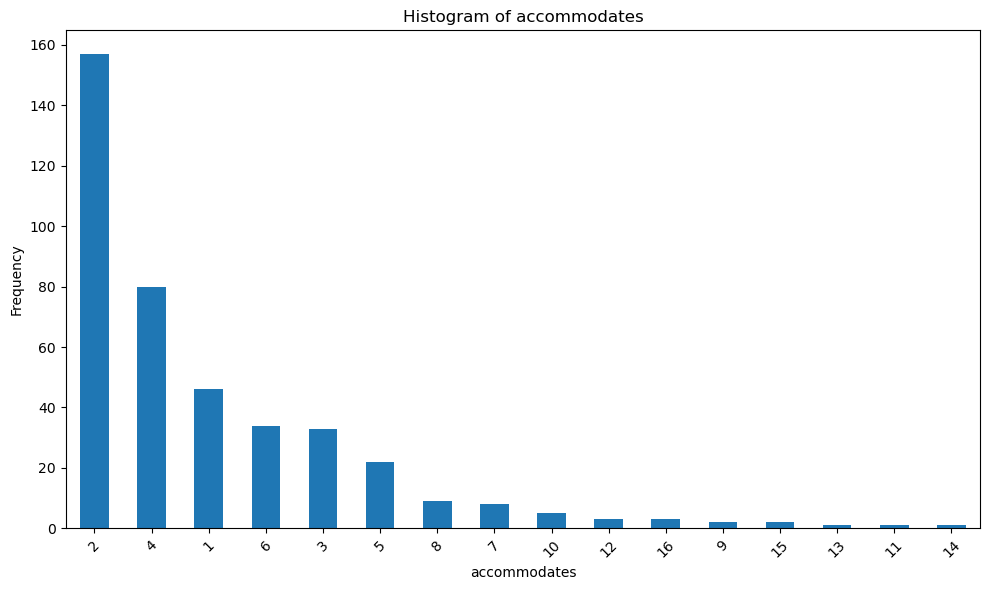

In [47]:
column_name = 'accommodates'

# Plot histogram
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
listings_d[column_name].value_counts().plot(kind='bar')
plt.title('Histogram of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()

# Result:
## This means the most rooms or renting places are for couples

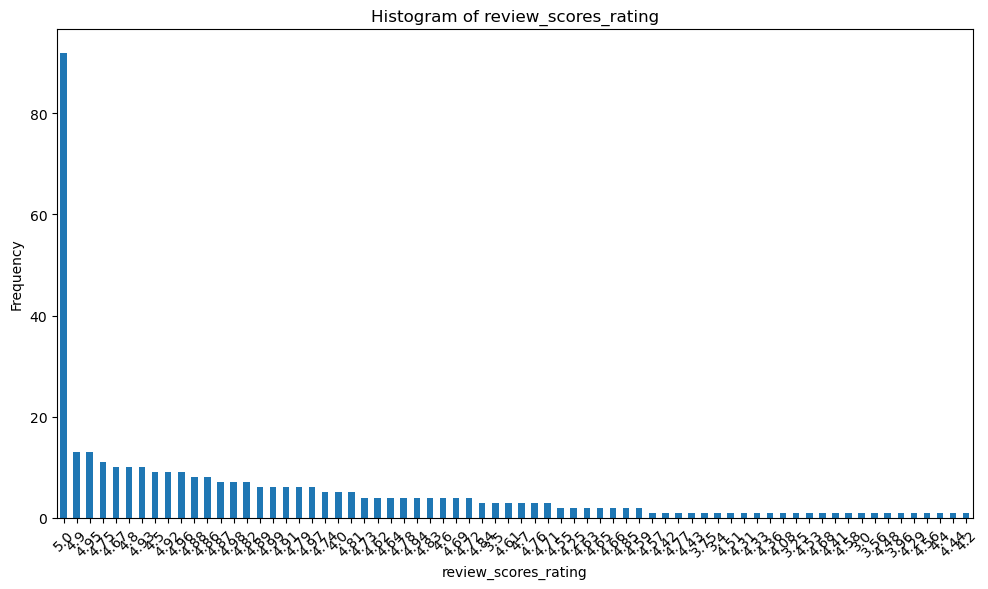

In [6]:
column_name = 'review_scores_rating'

# Plot histogram
plt.figure(figsize=(10, 6))  # Adjust the  figure size if needed
listings_d[column_name].value_counts().plot(kind='bar')
plt.title("Histogram of " + column_name)
plt.xlabel(column_name)
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# Results:
## - Here this graph means the most reviews is high which is great for Airbnb it self
## - and the lowest value is 4.2 but there's a specific review for every thing in more details.

# Now we wanna have a look on the prices:-

In [6]:
print(listings_d["price"][0])
print(listings_d['price'].dtype)

$50.00
object


# Here's a problem its not just integets python consider it object we need to make it `intergers`

In [17]:
# okay now this is an object data type we still cant anylsis
listings_d['price'] = listings_d['price'].astype(str) # let's convert it to string first
listings_d['price'] = listings_d['price'].fillna("$0.00") # aslo discovered there's an empty fields let's fill thim

# now the result look like "$50.00" we need to remove the special signs
listings_d['price'] = listings_d['price'].str.replace('$', '').str.replace('.', '').str.replace(',', '').astype(float)

# seems like there's extra `00` we 'll remove it by deviding by 100

In [18]:
listings_d["price"]

0       5000.0
1       7000.0
2      12500.0
3       6800.0
4      14000.0
        ...   
402    11700.0
403     5300.0
404     6000.0
405    11000.0
406     9800.0
Name: price, Length: 407, dtype: float64

In [19]:
listings_d["price"] = listings_d["price"]/100

# Now prices are perfect to anylsis

In [20]:
listings_d["price"]

0       50.0
1       70.0
2      125.0
3       68.0
4      140.0
       ...  
402    117.0
403     53.0
404     60.0
405    110.0
406     98.0
Name: price, Length: 407, dtype: float64

# I wanna have a look if each the places that have the same accommodate are having the same range of price or not.
# Also the regular range of prices (I'll use cross tabular)
## For getting the repeated range I'll fileter the extreme values

In [29]:
#cross_tab = pd.crosstab(listings_d['accommodates'], listings_d['price'])
listing_remove_far_prices = listings_d
listing_remove_far_prices = listing_remove_far_prices[listing_remove_far_prices["price"]<200] # for getting the repeated range

cross_tab = pd.crosstab(listing_remove_far_prices['accommodates'], listing_remove_far_prices['price'])
cross_tab

price,26.0,27.0,33.0,34.0,35.0,39.0,40.0,43.0,44.0,45.0,47.0,50.0,52.0,53.0,55.0,56.0,58.0,60.0,61.0,63.0,65.0,66.0,68.0,69.0,70.0,71.0,72.0,73.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,95.0,96.0,97.0,98.0,99.0,100.0,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,122.0,125.0,126.0,127.0,128.0,129.0,130.0,131.0,132.0,133.0,134.0,135.0,136.0,140.0,141.0,142.0,145.0,148.0,150.0,151.0,153.0,155.0,157.0,159.0,165.0,167.0,169.0,171.0,172.0,175.0,178.0,179.0,184.0,185.0,186.0,188.0,189.0,191.0,195.0,196.0,197.0,199.0
accommodates,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,2,1,1,2,1,0,1,1,8,1,3,1,1,6,0,1,5,0,2,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,1,0,1,4,1,6,0,5,7,1,0,1,2,1,3,1,2,1,5,1,0,0,4,1,1,3,1,4,1,0,0,2,1,2,2,4,2,0,0,2,2,1,0,1,2,7,3,1,1,0,3,0,0,0,1,7,1,0,1,0,3,1,1,0,0,6,0,4,0,0,0,0,0,0,0,0,0,1,5,2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,4,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,3,1,0,0,3,0,0,1,2,0,0,0,0,1,1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2,1,0,1,1,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,1,0,1,0,1,1,0,0,0,0,1,2,0,1,2,2,2,1,0,3,0,0,1,2,2,0,1,1,1,2,0,0,1,0,3,0,0,0,0,0,1,0,1,2,5,1,2,1,1,1,0,0,1,1,1,1,1,2,0,1,0,2,0,2,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,1,1,0,1,1,0,1,1,0,1,0,0,2,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,1
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,1,0
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Results:
## - The extremely high prices are all very big accommodates cause in this cross tabular the heist price and accommodate are 200$, 2
## - There's a gradient in the prices cause higher accommodate mean higher prices and u can also see the same thing is the next chart 

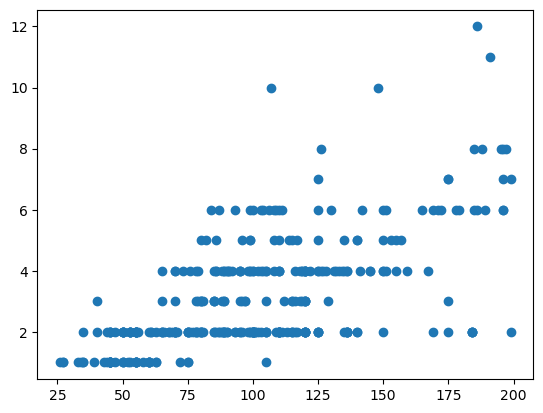

In [33]:
plt.scatter(listing_remove_far_prices['price'], listing_remove_far_prices['accommodates'])

# Here you can see the points on the left (cheaper) are moving with the higher accomodates to the left and this is the gradient

<Axes: xlabel='price'>

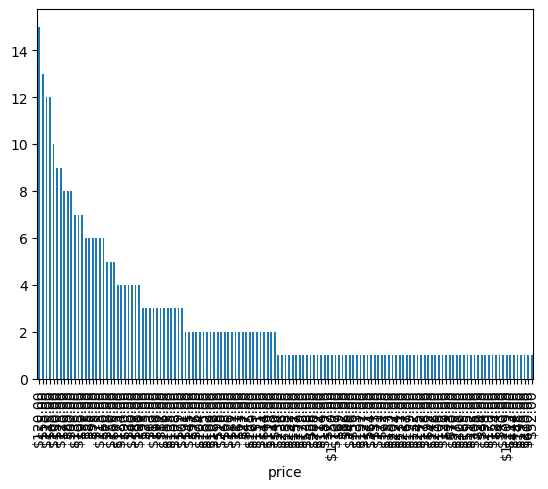

In [9]:
listings_d["price"].value_counts().plot(kind="bar")
# ooh the curve cause there's a lot of prices I won't be able to see what is the most repeated price to start feeling what is the expensive
# places and the cheap ones

In [112]:
print(listings_d["price"].value_counts())
print("\nThe mean is :")
print(listings_d["price"].mean())
print("\nThe mean is :")
print(listings_d["price"].mode())
# greate now the most repeated price is 120
# now we can say that the prices is around 120 higher or lower
#let's see what is the heighst price and the lowest
print("\nThe maximum is :")
print(listings_d["price"].max())

print("\nThe minimum is :")
print(listings_d["price"].min())

# Oh that's a huge difference

price
120.0    15
55.0     13
110.0    12
45.0     12
100.0    10
         ..
148.0     1
195.0     1
219.0     1
600.0     1
52.0      1
Name: count, Length: 139, dtype: int64

The mean is :
125.2032967032967

The mean is :
0    120.0
Name: price, dtype: float64

The maximum is :
1750.0

The minimum is :
26.0


# we can also use the box chat 

<Axes: >

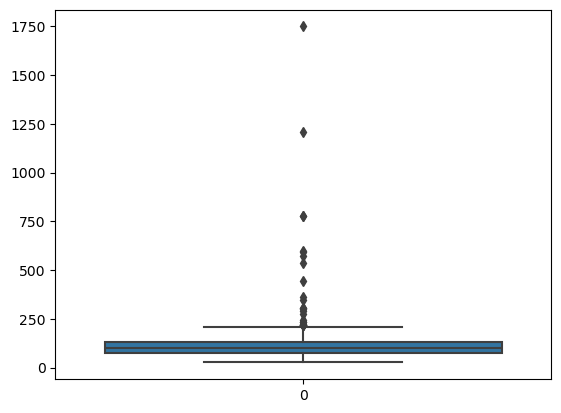

In [128]:
sns.boxplot(listings_d["price"])

# Result:  
## - The box chart is saying that the range of the 50% is very tight between 0 and 250

# Let's see the review according to the prices

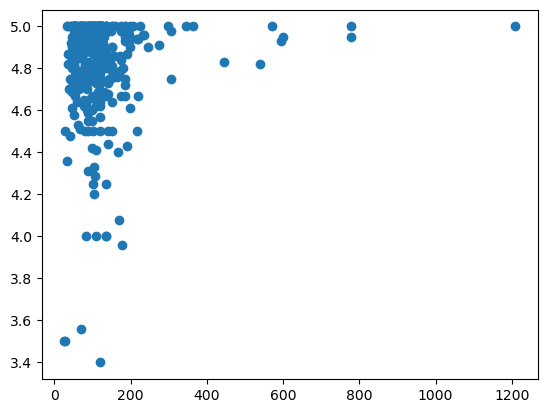

In [113]:
plt.scatter(listings_d["price"],listings_d["review_scores_rating"])

# Results:-
## - seems like the very high prices are so little and it's review is high but we can't judge acording to them (I'll remove the far prices) and see

In [23]:
listing_remove_far_prices = listings_d
listing_remove_far_prices = listing_remove_far_prices[listing_remove_far_prices["price"]<200]
# great now we dont have the very far values

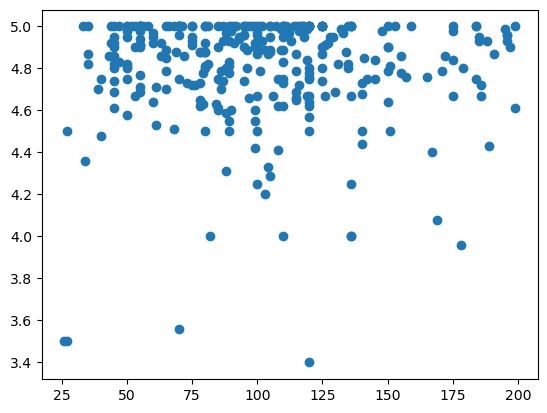

In [133]:
plt.scatter(listing_remove_far_prices["price"],listing_remove_far_proces["review_scores_rating"])

# Results:-
## okay seems like there's no obviese relation between the prices and the reviews

C:\Users\PC\AppData\Local\Temp\ipykernel_22328\2305879366.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(listing_remove_far_prices["price"])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

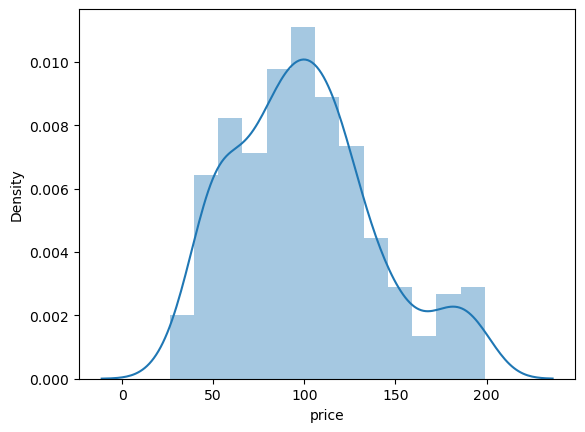

In [134]:
sns.distplot(listing_remove_far_prices["price"])

`The density is showing kind of normal distribution but no it's not`
# Result: 
## But most of the prices are 100 higher or lower same as what we discovered from the mean and mode
## Okay I think we are done with the price we have a very good idea about it and it ranges now

has_availability
t    335
Name: count, dtype: int64


C:\Users\PC\AppData\Local\Temp\ipykernel_20616\1512735713.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(listings_d["availability_30"])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PC\AppData\Local\Temp\ipykernel_20616\1512735713.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar 

<Axes: xlabel='availability_90', ylabel='Density'>

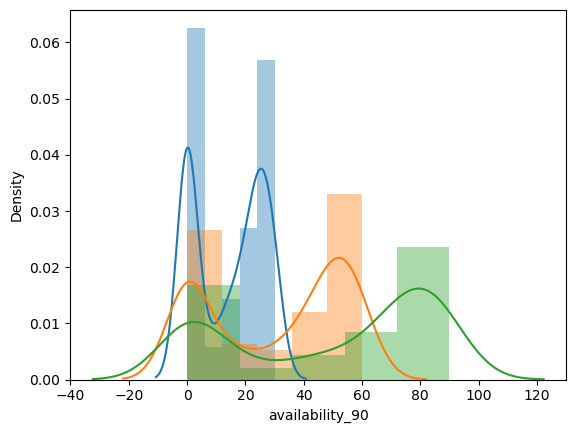

In [26]:
print(listing_remove_far_prices["has_availability"].value_counts())
sns.distplot(listings_d["availability_30"])
sns.distplot(listing_remove_far_prices["availability_60"])
sns.distplot(listing_remove_far_prices["availability_90"])

# Results:-
## - Seems from the density chart that most of the places aren't available in the next month at all 
## - Also on the 2 and 3-month frame it just looks extended in more details go down

C:\Users\PC\AppData\Local\Temp\ipykernel_20616\1241547086.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(listing_remove_far_prices["availability_365"])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='availability_365', ylabel='Density'>

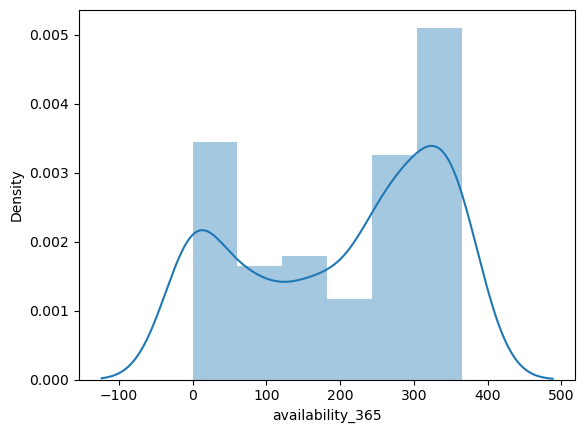

In [37]:
sns.distplot(listing_remove_far_prices["availability_365"])

`Here I see Year only`
# Results:-
## - half of the places are totaly free
## - 1/3 of the places are totaly Rented the whole year

In [33]:
print(listings_d["availability_30"].value_counts())# there's 140 place not available at all till next month almost 40%
print(listings_d["availability_60"].value_counts())# there's 115 place not available at all till next 2 months almost 30%
print(listings_d["availability_90"].value_counts())# there's 94 place not available at all till next 3 months almost 25%
print(listings_d["availability_365"].value_counts())# there's 76 place not available at all till next year wow

availability_30
0     140
30     39
25     31
26     19
24     19
28     16
21     12
23     12
22     12
18     12
19     11
15     11
14      8
29      8
12      7
20      7
27      7
4       5
10      5
13      4
8       4
3       3
16      3
2       2
1       2
17      2
6       2
9       2
7       1
5       1
Name: count, dtype: int64
availability_60
0     115
60     36
55     20
52     15
58     14
54     14
48     13
56     12
51     11
49     11
53      9
59      8
50      8
44      8
45      7
40      7
41      5
42      5
47      5
37      5
32      4
14      4
46      4
17      4
15      4
38      4
13      3
12      3
36      3
29      3
28      3
34      3
35      2
2       2
8       2
31      2
26      2
4       2
23      2
57      2
24      2
18      2
27      2
1       2
6       2
3       1
20      1
19      1
9       1
7       1
5       1
43      1
16      1
22      1
25      1
11      1
Name: count, dtype: int64
availability_90
0     94
90    30
81    16
78    12
82  

# Here I just tried to check if I understand this right
## All the places that are not available till next year aren't available till the next 3 months and 3 months till 2 months and so on

In [41]:
listings_d[listings_d["availability_365"] == 0].head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1489424,https://www.airbnb.com/rooms/1489424,20240214034713,2024-02-14,city scrape,"Welcoming, easygoing, comfy bed, entire level","Queen size bed, extra comfy mattress, with acc...",Quiet yet convenient.,https://a0.muscache.com/pictures/21977748/1dc8...,5294164,https://www.airbnb.com/users/show/5294164,Efrat,2013-03-02,"Albany, NY","I am originally from Brooklyn, New York. As an...",within an hour,100%,89%,f,https://a0.muscache.com/im/users/5294164/profi...,https://a0.muscache.com/im/users/5294164/profi...,NaN,1,2,"['email', 'phone']",t,t,"Albany, New York, United States",FOURTEENTH WARD,NaN,42.66719,-73.81580,Private room in home,Private room,2,1.0,1 private bath,1.0,1.0,"[""Fire extinguisher"", ""Free washer \u2013 In u...",50.0,1,1125,1,1,1125,1125,1.0,1125.0,NaN,t,0,0,0,0,2024-02-14,242,48,2,2013-09-10,2024-02-10,4.75,4.82,4.56,4.92,4.92,4.82,4.81,NaN,f,1,0,1,0,1.91
4,6623339,https://www.airbnb.com/rooms/6623339,20240214034713,2024-02-14,city scrape,Center Sq. Loft in Converted Precinct w/ Parking,Large renovated 1 bedroom apartment in convert...,"Located in Albany's finest urban neighborhood,...",https://a0.muscache.com/pictures/c9f06fb9-88e0...,19648678,https://www.airbnb.com/users/show/19648678,Terra,2014-08-07,NaN,"I'm from Kansas City, MO. I've driven the enti...",within a day,90%,63%,f,https://a0.muscache.com/im/users/19648678/prof...,https://a0.muscache.com/im/users/19648678/prof...,Center Square & Hudson/Park,4,8,"['email', 'phone']",t,t,"Albany, New York, United States",SIXTH WARD,NaN,42.65222,-73.76724,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Hangers"", ""Hot water"", ""Bed linens"", ""Dishwa...",140.0,1,1125,1,1,1125,1125,1.0,1125.0,NaN,t,0,0,0,0,2024-02-14,306,5,0,2015-06-07,2023-12-26,4.73,4.83,4.71,4.83,4.68,4.81,4.72,NaN,f,4,4,0,0,2.89


# Okay now let's try to see the relation between the Reviews and the availability

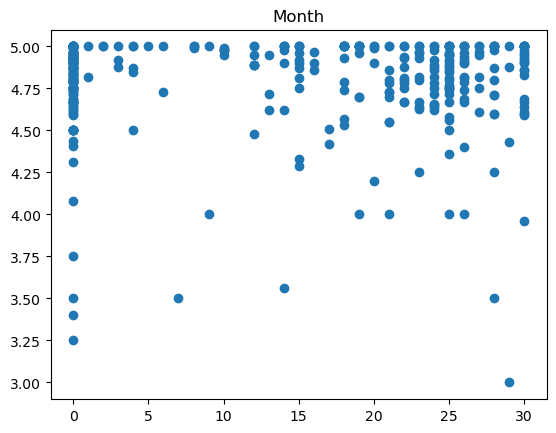

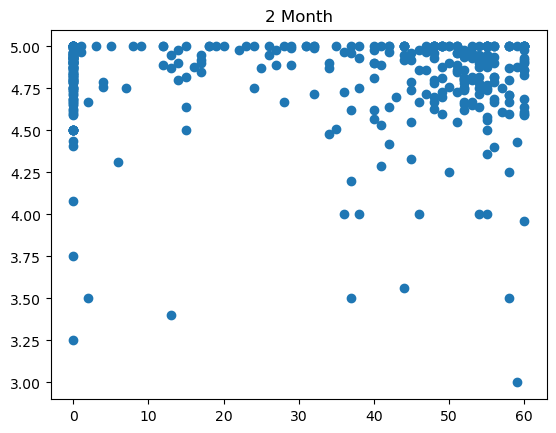

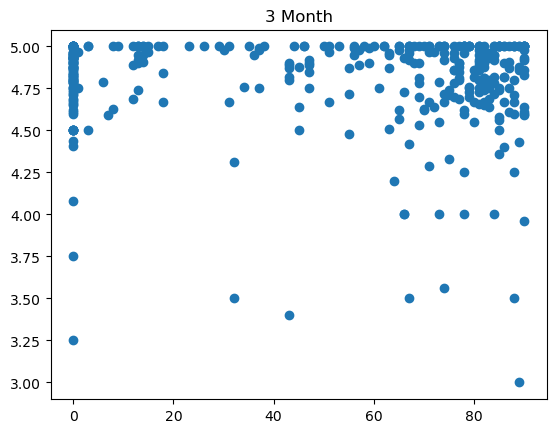

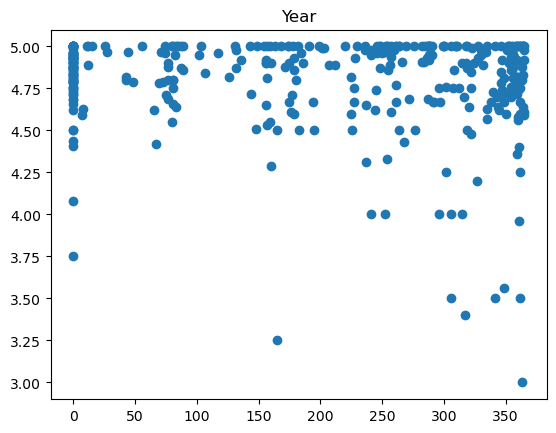

In [52]:
plt.scatter(listings_d["availability_30"],listings_d["review_scores_rating"])
plt.title("Month")
plt.show()
plt.scatter(listings_d["availability_60"],listings_d["review_scores_rating"])
plt.title("2 Month")
plt.show()
plt.scatter(listings_d["availability_90"],listings_d["review_scores_rating"])
plt.title("3 Month")
plt.show()
plt.scatter(listings_d["availability_365"],listings_d["review_scores_rating"])
plt.title("Year")
plt.show()

# Result:-
## - Generaly there's a concentration between the high rate place and unavailability on all the scales.
## - High rate means renting.

# ========================================

## Okay we can judge that the places which are not available till next year are very good cause it rented
`So I wanna see what is the accommodate for these successful places`

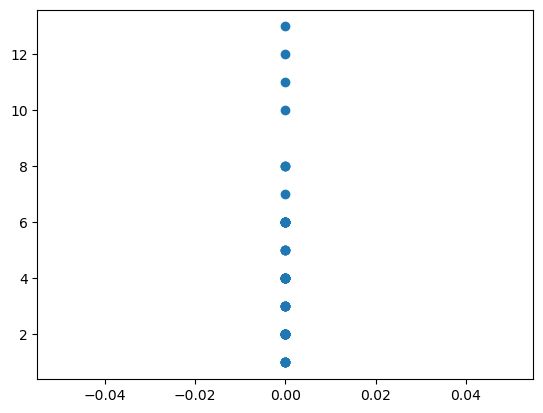

In [42]:
year_rent = listings_d[listings_d["availability_365"] == 0]
plt.scatter(year_rent["availability_365"],year_rent["accommodates"])

# Result:-
## - Seems like the accommodation in't related to the amount of rent

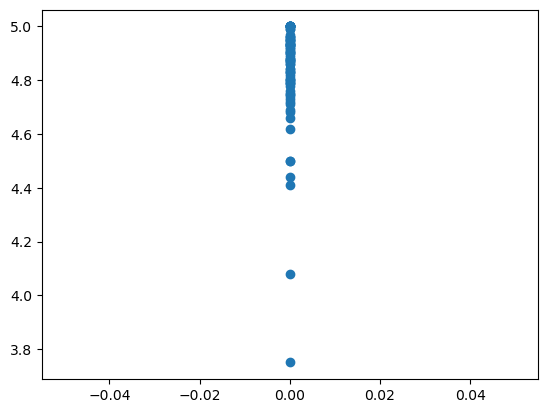

In [43]:
plt.scatter(year_rent["availability_365"],year_rent["review_scores_rating"])

# Result:-
## - More clearly higher review higher rent
## - This chart also proves the Idea more clearly higher review higher rent

# ==================================

# I wanna also make compare between the host_respose rate and the availability
## - I'll start with cleaning and preprocess the data

In [5]:

#plt.scatter(listings_d["availability_30"],listings_d["host_response_rate"])
# okay theres a similar problem like the
print(listings_d["host_response_rate"].dtype)
listings_d["host_response_rate"].astype(str) # now it's string let's remove the `%`
listings_d["host_response_rate"] = listings_d["host_response_rate"].str[:-1] 

object


In [6]:
listings_d["host_response_rate"][0]# perfekt
# we just need to devide it by 100 for making it a ration number I feel it'll be better

'100'

In [7]:
listings_d['host_response_rate'] = listings_d['host_response_rate'].fillna(0)
listings_d["host_response_rate"].astype(int)/100

0      1.0
1      1.0
2      0.9
3      1.0
4      0.9
      ... 
402    1.0
403    1.0
404    1.0
405    1.0
406    1.0
Name: host_response_rate, Length: 407, dtype: float64

In [44]:
listings_d['host_response_rate'] = listings_d['host_response_rate'].astype(int)

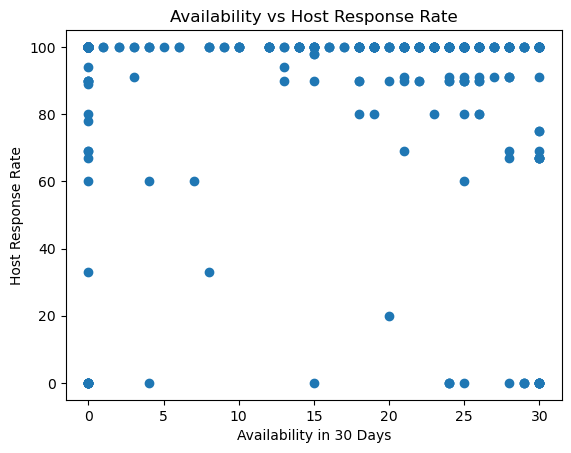

In [45]:
# all this handeling for host_response_rate now let's make the comparting
plt.scatter(listings_d["availability_30"], listings_d["host_response_rate"])
plt.xlabel('Availability in 30 Days')
plt.ylabel('Host Response Rate')
plt.title('Availability vs Host Response Rate')
plt.show()

# Result:-
## - The Higher Host Response means Higher rents
## - Here with some focus you can see that the look at the row of the column of the dots on the left
## - That means this place is rented for the next 30 days most of the hosts here have a high response rate

# ====================

# Now I wanna see something important the Review Rate
## Question: What is the most review parameter that makes your review Higher (review_scores_cleanliness,review_scores_checkin,
## review_scores_communication or review_scores_location) ?
## let's charts

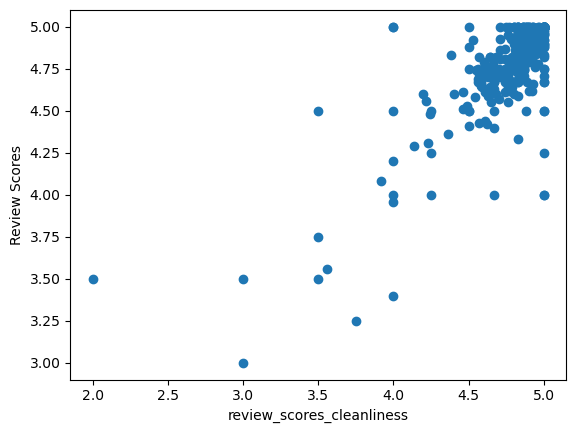

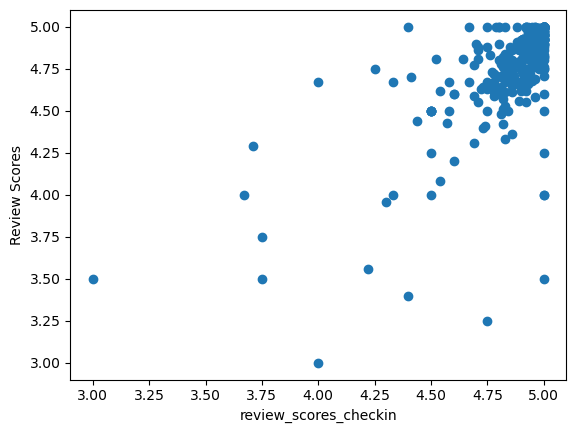

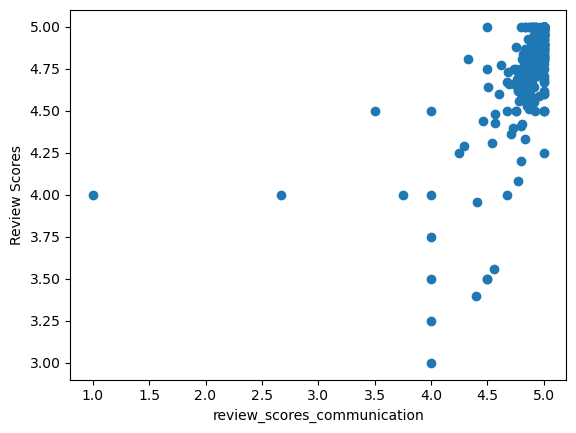

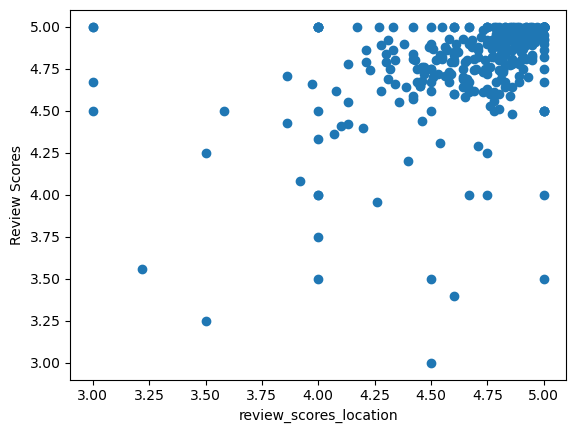

In [50]:
for i in ["review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location"] :
    plt.scatter(listings_d[i],listings_d["review_scores_rating"])
    plt.xlabel(i)
    plt.ylabel('Review Scores')
    #plt.title(i,' vs Review Scores')
    plt.show()

# Results:-
## - okay seems that all of them are affecting the Review Scores but I see...
## - I see that communication is the most effective cause there's no high communication and low rate
## - Location isn't affecting that much
## - kitchen rating and cleaning are in between the last tow
## - Result: Comminucation is the most important here. to get high rate

# ===========================

# Okay now I wanna have a look where is the locations that have a higher general rates and high location rates ?
## Okay let's answer this question too.
## For this one I have a great Idea!

C:\Users\PC\AppData\Local\Temp\ipykernel_20452\2792087548.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


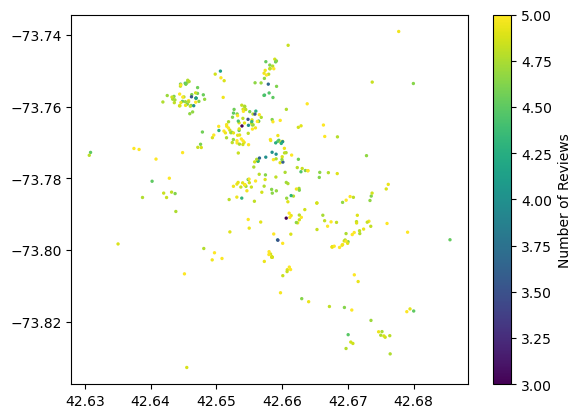

In [56]:
latitude = listings_d['latitude']
longitude = listings_d['longitude']
reviews = listings_d['review_scores_value']
# Define colormap
cmap = plt.cm.get_cmap('viridis')
scatter = plt.scatter(latitude, longitude, c=reviews, cmap=cmap,s=2)
plt.colorbar(scatter, label='Number of Reviews')

# Result:- 
## Here I draw an 2D map of the places and each dot have color speak about the generale rate

C:\Users\PC\AppData\Local\Temp\ipykernel_20452\1263905166.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


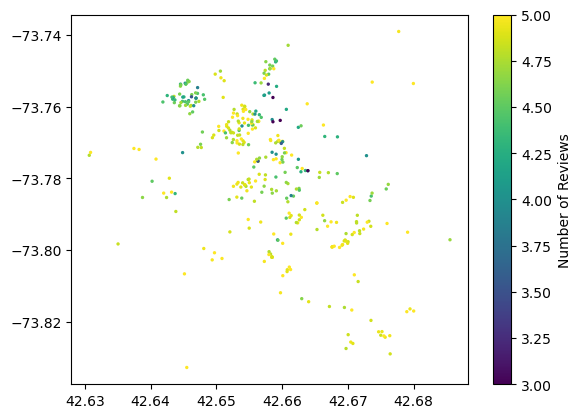

In [57]:
latitude = listings_d['latitude']
longitude = listings_d['longitude']
reviews = listings_d['review_scores_location']
# Define colormap
cmap = plt.cm.get_cmap('viridis')
scatter = plt.scatter(latitude, longitude, c=reviews, cmap=cmap,s=2)
plt.colorbar(scatter, label='Number of Reviews')




# Results:-
## Here seems like the people are more like the part of the center city also the down right part
## less for the top left and the top right

![Alt text]("./screens.png")

In [ ]:
#great - hospitable - accommodating - welcoming - recommend - perfect - friendly - pleasant - grateful
#goods = ["great","hospitable","accommodating","welcoming","recommend","perfect",
#"Clean","awesome","friendly","pleasant","grateful","enjoyed","Wonderful","polite"]

positive_words = ['welcoming','accommodating','comfy','restful','pleasant','perfect','cozy',
    'personable','friendly','grateful','clean','warm', 'helpful','peaceful','enjoyable',
    'delightful','recommend','nice','quiet','spacious','responsive','gracious','beautiful','flexible','comfortable',
    'spotless','convenient','heartwarming','fantastic',
    'adorable','affordable','tidy','easy', 'fantastic','adoreable','friendly','fantastic',
    'adorable','clean','comfy','fantastic','convenient','great'
]

negative_words = [
    'late arrival','messy', 'spread around','felt on our own',
    'quite late arrival','basement','messy', 'less privacy',
    'less tidy','noise (for light sleepers)','far (for transportation)','problem (without a car)',
    'problem (with a car)','heavy smoke smell','unsafe area',
    'dirty floors','stained carpet','lack of towels','light fixture malfunction',
    'noisy neighbors','inadequate parking','bad smell','dirty coffee machine',
    'cheap towels','uneven flooring', 'malfunctioning shower head','poor quality bedding',
    'unclean surroundings','uncommunicative host'
]


# The End Here I'll give my advice to the decision-maker:-

- we  can do marketing in the area which is (top right of the city) which is the places that have less renting (more customers)

- we can try to make marketing for the people who live in the high-rated areas cause they may be potential hosts 
  if they join that's a win cause we gonna advise them that they can make a revenue through their place (more apartments) even if
  they have one room or even a bid.

- we also need to make it clear to our hosts that the comminucation is extremely important for your rate
  with your communication, you can rent more and make more money.

- if the host is confused about what is the price he should put around the average (120$)

- we need to make it clear for the hosts to respond to the messages that come from clients that'll make more rents